# Advanced Algorithms for Regression

Note: This notebook requires the following libraries to run, on top on Anaconda2 4.0:
1. tensorflow 0.8.0 or higher (obtained on the conda package repositories under conda-forge)
2. xgboost (obtained on PyPi - so you can do a pip install)

### Topics covered for regression:
* Regular MLR (sklearn)
* Support Vector Regression (Linear SVR and SVR)
* XGBoost Regressor (XGBRegressor)
* Deep Neural Network Regression (TensorFlowDNNRegressor)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split

## Function to generate data

In [2]:
def gen_data(years, start_date):
    x1,x2,x3 = np.random.normal(10,1,years*365), np.random.normal(15,2,years*365), np.random.normal(12.2,3,years*365)
    index = pd.date_range(start=start_date, periods=years*365)
    index2 = np.arange(1,(years*365)+1,1)
    data = {"index":index, "x1":x1, "x2":x2, "x3":x3, "x4":x1+x2+x3+np.random.normal(0,2,len(x1)), "x5": x3 + 2*x2 + 3*x1 + np.random.normal(0,2,len(x1)) }
    data = pd.DataFrame(data).set_index("index")
    return data

# Generate data

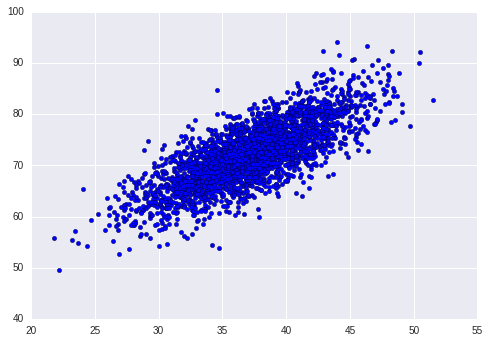

In [3]:
dataset = gen_data(10,"2005-01-01")
y = dataset['x5']
del dataset['x5']
xtr, xts, ytr, yts = train_test_split(dataset, y)
plt.scatter(xtr['x4'], ytr)

# Linear Regression

A multiple linear regression model helps us establish a baseline performance with which to compare other algorithms.

R^2 of the model:  0.891654387595


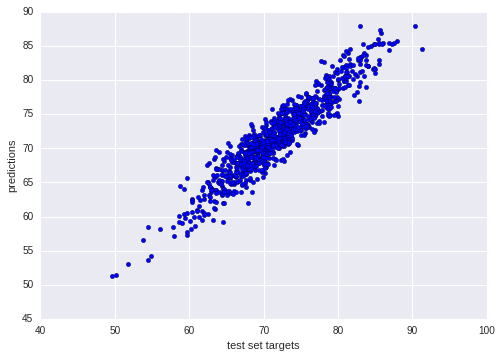

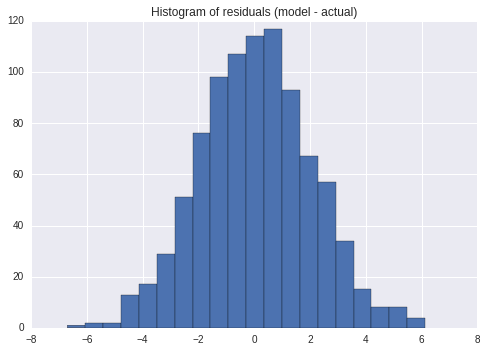

In [4]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(xtr, ytr)
print "R^2 of the model: ", lrmodel.score(xts, yts)
plt.scatter(yts, lrmodel.predict(xts))
plt.xlabel("test set targets")
plt.ylabel("predictions")
plt.show()
plt.hist(lrmodel.predict(xts) - yts, bins=20)
plt.title("Histogram of residuals (model - actual)")
plt.show()

## Regression using L1 and L2 regularization conditions

R^2 of the model:  0.891746735398


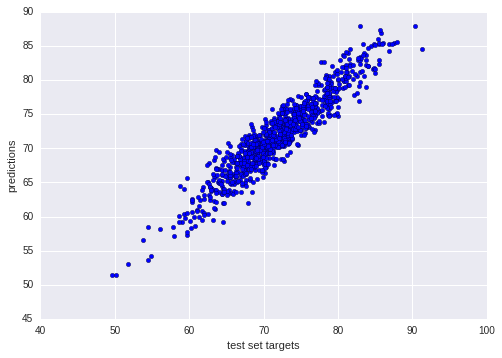

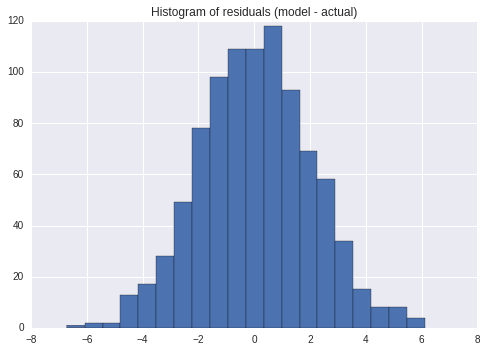

In [5]:
from sklearn.linear_model import Lasso
lrmodel = Lasso(alpha=0.01) #Different values of alpha yield different levels of regularization
lrmodel.fit(xtr, ytr)
print "R^2 of the model: ", lrmodel.score(xts, yts)
plt.scatter(yts, lrmodel.predict(xts))
plt.xlabel("test set targets")
plt.ylabel("predictions")
plt.show()
plt.hist(lrmodel.predict(xts) - yts, bins=20)
plt.title("Histogram of residuals (model - actual)")
plt.show()

R^2 of the model:  0.891654508728


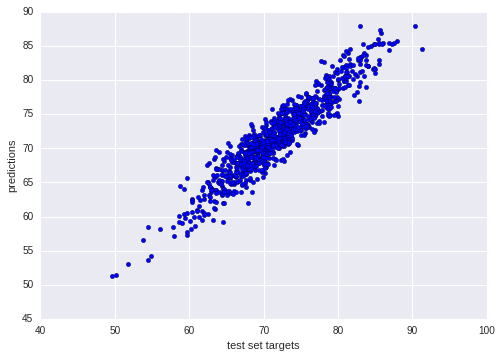

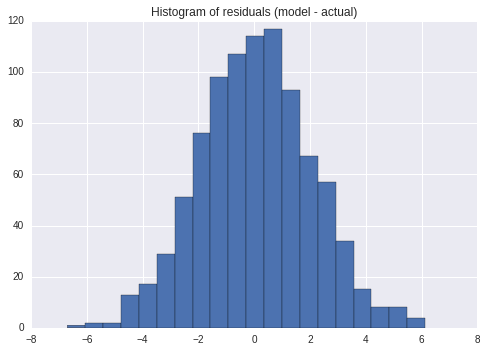

In [6]:
from sklearn.linear_model import Ridge
lrmodel = Ridge(alpha=0.01) #Different values of alpha yield different levels of regularization
lrmodel.fit(xtr, ytr)
print "R^2 of the model: ", lrmodel.score(xts, yts)
plt.scatter(yts, lrmodel.predict(xts))
plt.xlabel("test set targets")
plt.ylabel("predictions")
plt.show()
plt.hist(lrmodel.predict(xts) - yts, bins=20)
plt.title("Histogram of residuals (model - actual)")
plt.show()

# Regression using Linear SVR

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import r2_score

## Parameter search based machine learning using an SVR


C:  0.001 Test set R^2 score:  0.812636865657


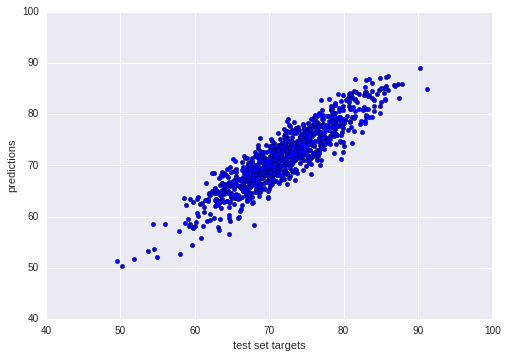

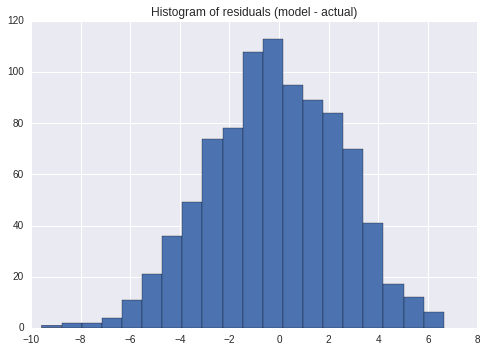


C:  0.01 Test set R^2 score:  0.891173721978


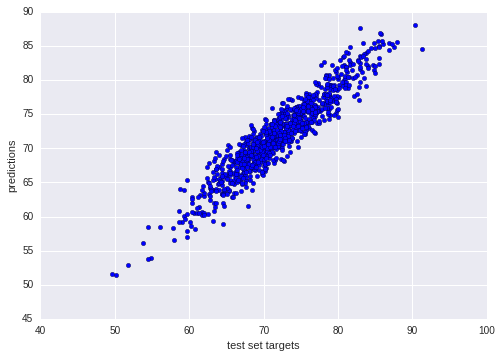

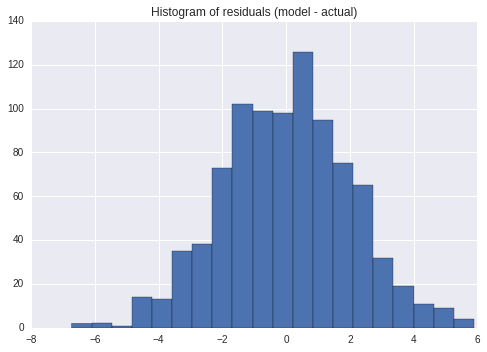


C:  0.1 Test set R^2 score:  0.891649989673


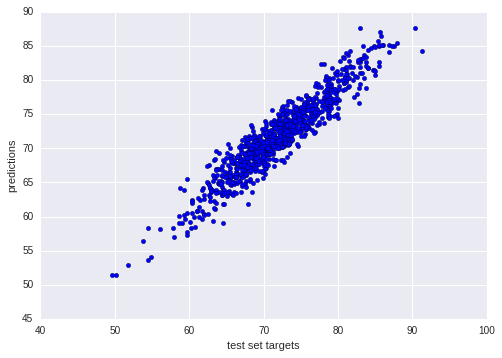

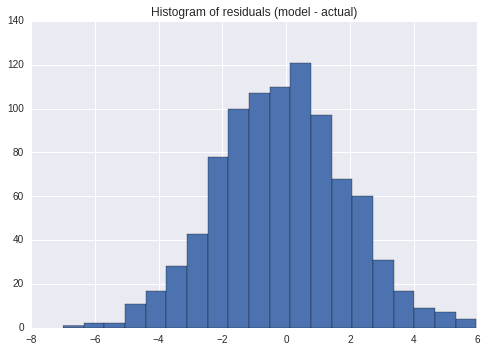


C:  0.5 Test set R^2 score:  0.890119647849


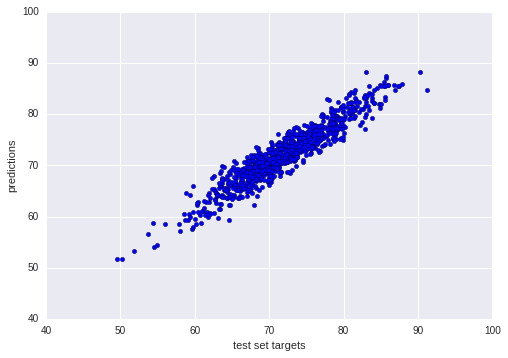

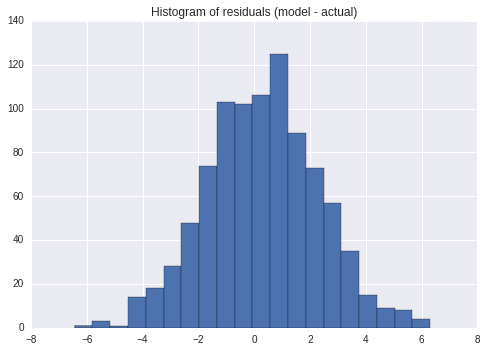


C:  1 Test set R^2 score:  0.883010913466


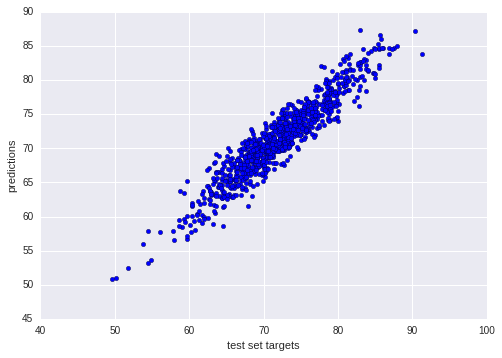

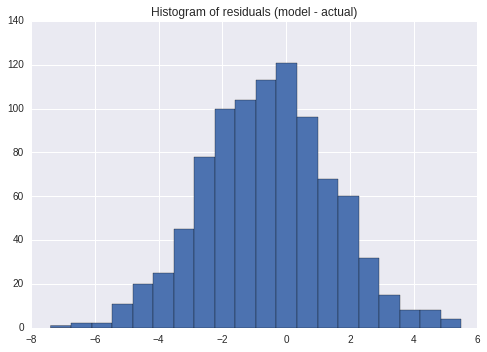

In [8]:
for c in [0.001, 0.01, 0.1, 0.5, 1]:
    lsvr = LinearSVR(C=c)
    lsvr.fit(xtr, ytr)
    lsvrpred = lsvr.predict(xts)
    print "\nC: ", c, "Test set R^2 score: ", r2_score(yts, lsvrpred)
    plt.scatter(yts, lsvrpred)
    plt.xlabel("test set targets")
    plt.ylabel("predictions")
    plt.show()
    plt.hist(lsvr.predict(xts) - yts, bins=20)
    plt.title("Histogram of residuals (model - actual)")
    plt.show()

## Parameter searching for an RBF kernel SVR


C:  0.001 Test score:  0.883010913466


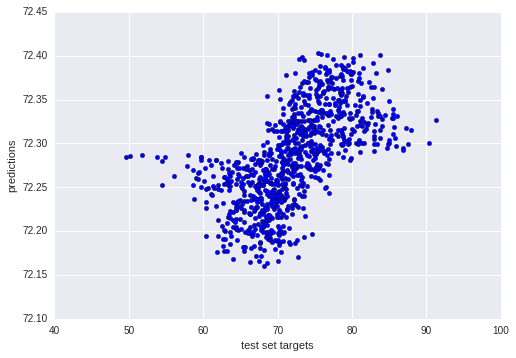

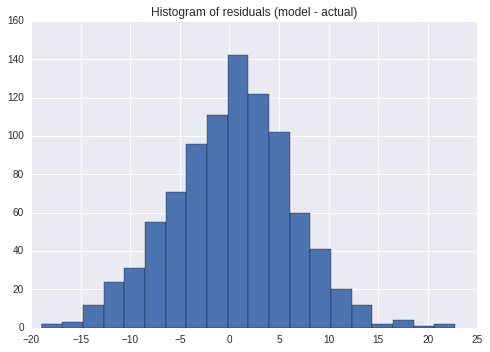


C:  0.01 Test score:  0.883010913466


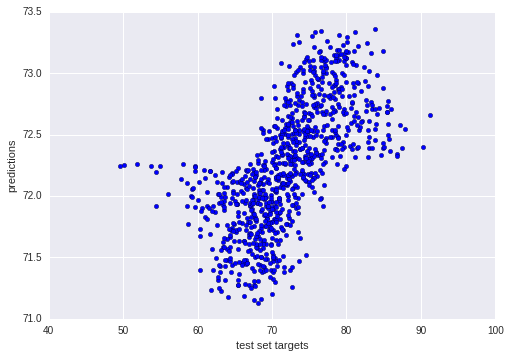

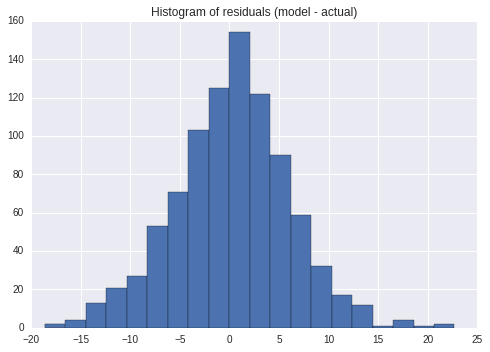


C:  0.1 Test score:  0.883010913466


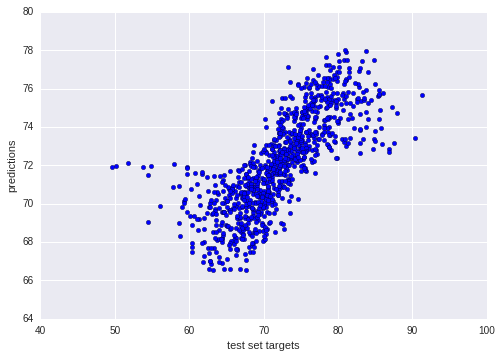

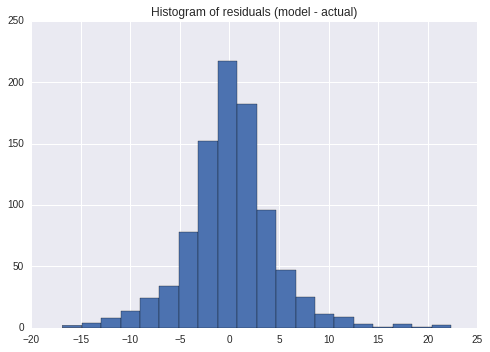


C:  0.5 Test score:  0.883010913466


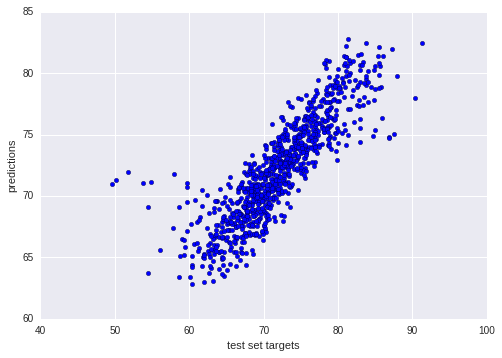

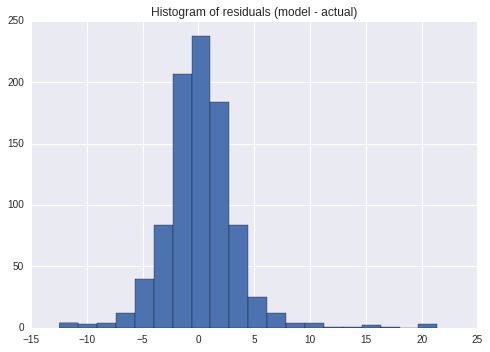


C:  1 Test score:  0.883010913466


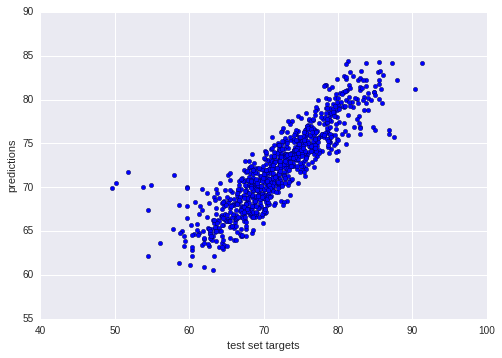

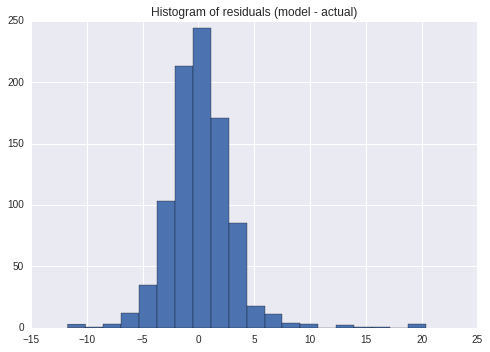

In [9]:
for c in [0.001, 0.01, 0.1, 0.5, 1]:
    svr = SVR(C=c, epsilon=0.01,)
    svr.fit(xtr, ytr)
    svrpred = svr.predict(xts)
    print "\nC: ", c, "Test score: ", r2_score(yts, lsvrpred)
    plt.scatter(yts, svrpred)
    plt.xlabel("test set targets")
    plt.ylabel("predictions")
    plt.show()
    plt.hist(svrpred - yts, bins=20)
    plt.title("Histogram of residuals (model - actual)")
    plt.show()

## Parameter searching for a TensorFlow DNN Regressor

Layers:  [25] Test score:  0.707870829245


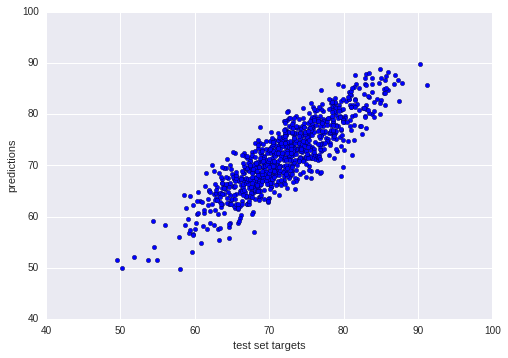

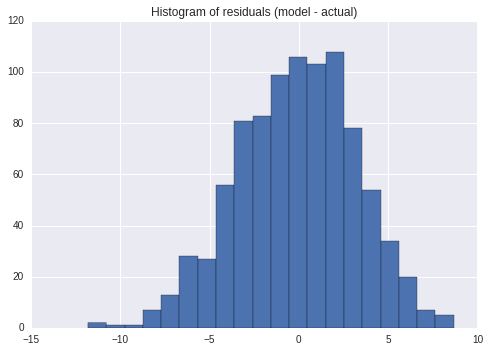

Layers:  [25, 25] Test score:  0.865397510941


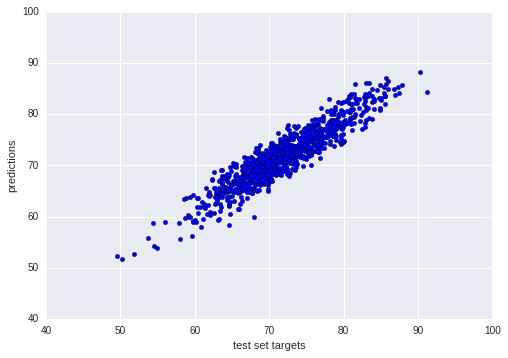

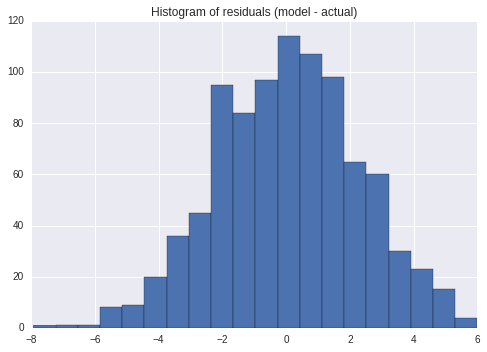

Layers:  [25, 25, 25] Test score:  0.866712586352


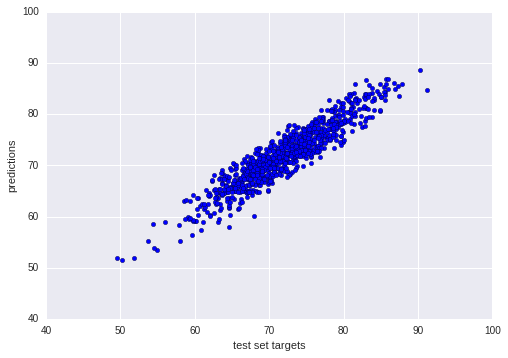

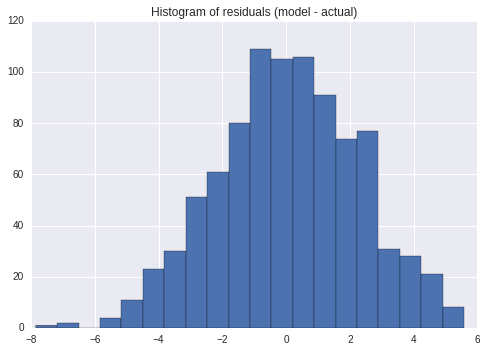

Layers:  [25, 25, 25, 25] Test score:  0.886666559384


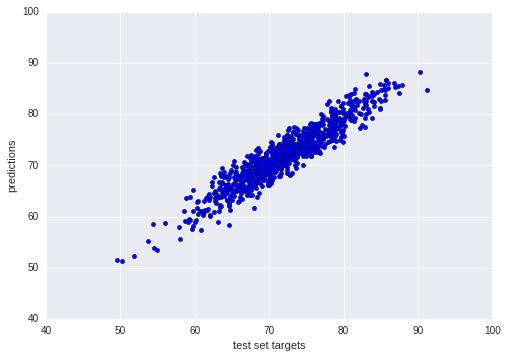

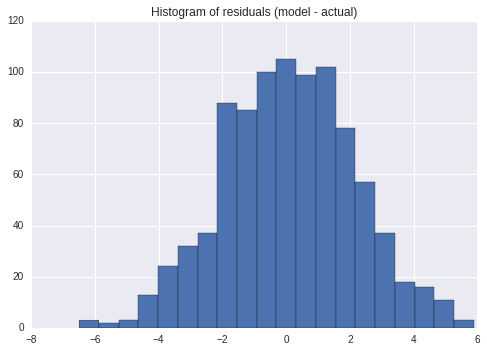

Layers:  [25, 25, 25, 25, 25] Test score:  0.889981565434


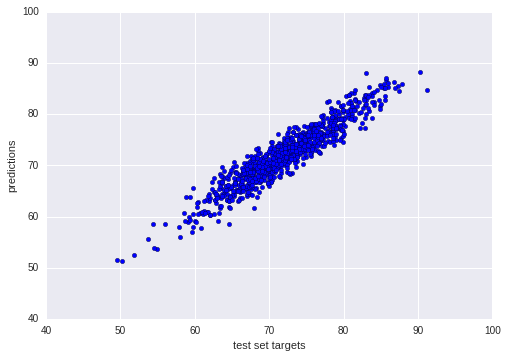

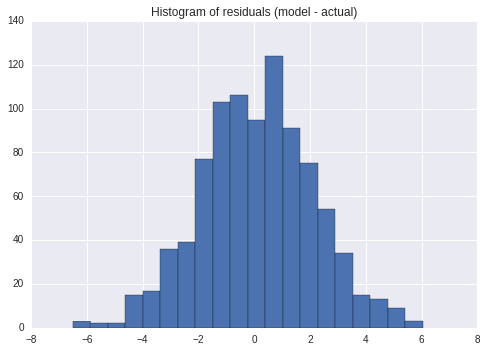

In [19]:
import tensorflow.contrib.learn as skflow
from sklearn.preprocessing import scale


for layers in [1,2,3,4,5]:
    dnn = skflow.TensorFlowDNNRegressor(hidden_units=[(len(xtr.columns)+1)*5]*layers, verbose=False, 
                                        steps = 10000, learning_rate=0.001)
    #xtr, ytr = scale(xtr), scale(ytr)
    #print xtr, ytr
    dnn.fit(xtr, ytr)
    dnnpred = dnn.predict(xts)
    dnnpred = [val for sublist in dnnpred for val in sublist]
    print "Layers: ", dnn.hidden_units, "Test score: ", dnn.score(xts,yts)
    plt.scatter(yts, dnnpred)
    plt.xlabel("test set targets")
    plt.ylabel("predictions")
    plt.show()
    plt.hist(dnnpred - yts.values, bins=20)
    plt.title("Histogram of residuals (model - actual)")
    plt.show()

# Parameter search for an XGBoost Regressor


Estimators:  100 Test score:  0.870566353515


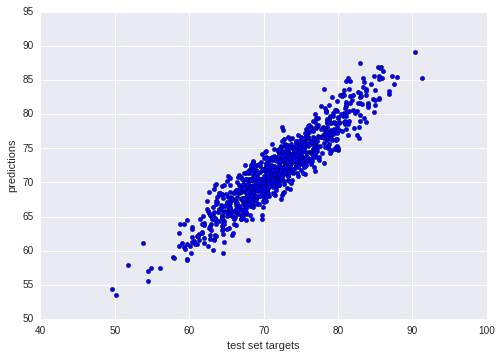

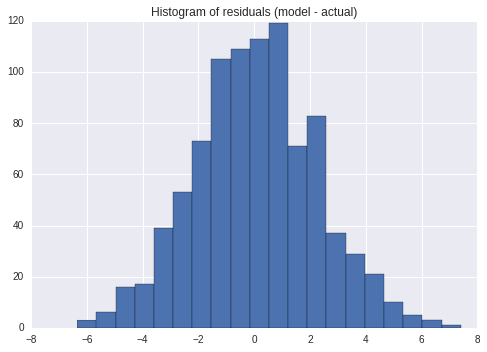


Estimators:  500 Test score:  0.87312475907


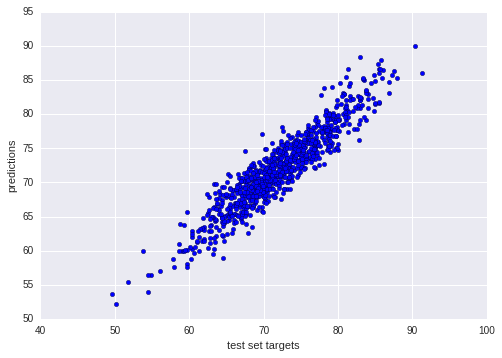

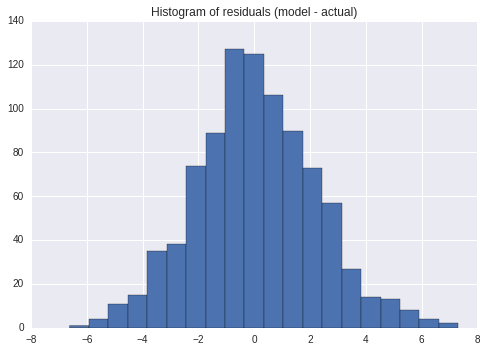


Estimators:  1000 Test score:  0.864415282593


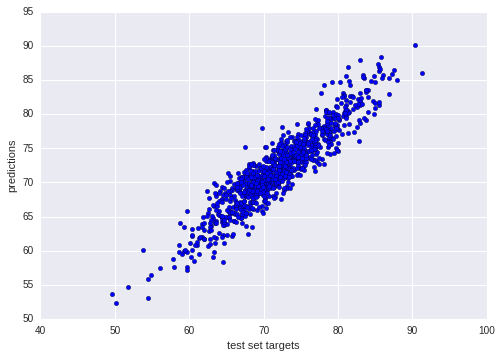

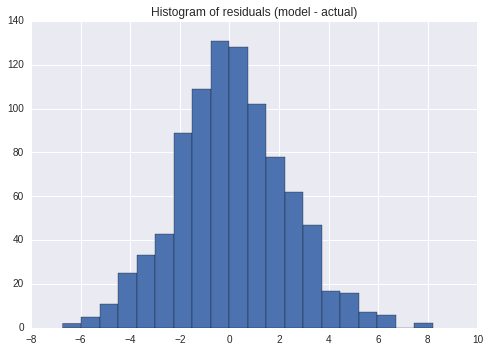


Estimators:  10000 Test score:  0.836264019619


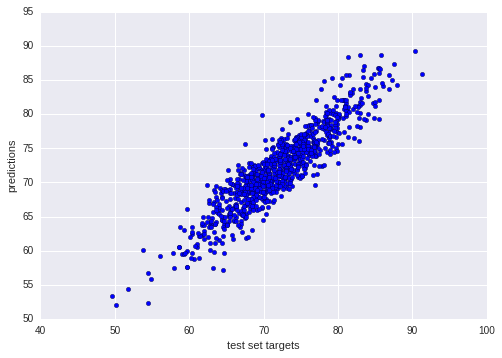

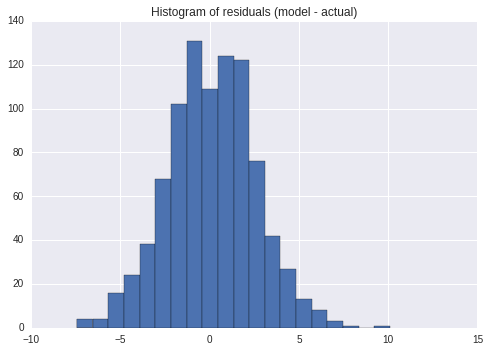


Estimators:  100000 Test score:  0.83491164904


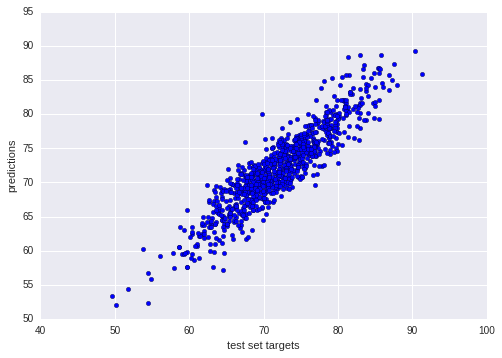

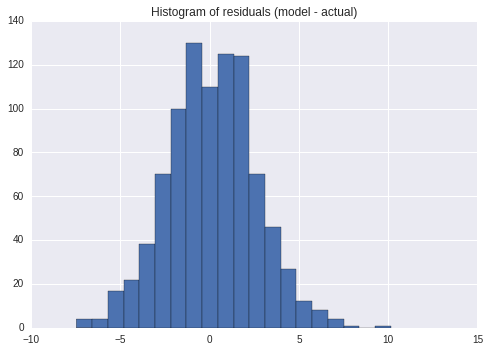

In [20]:
from xgboost import XGBRegressor

for estimators in [100, 500, 1000, 10000, 100000]:
    xgb = XGBRegressor(n_estimators=estimators, learning_rate=0.1)
    xgb.fit(xtr, ytr.values)
    xgbpred = xgb.predict(xts)
    print "\nEstimators: ", estimators, "Test score: ", r2_score(yts, xgbpred)
    plt.scatter(yts, xgbpred)
    plt.xlabel("test set targets")
    plt.ylabel("predictions")
    plt.show()
    plt.hist(xgbpred - yts, bins=20)
    plt.title("Histogram of residuals (model - actual)")
    plt.show()

## Observations

* For a lot of well defined problems, specialized algorithms work better than general purpose algorithms
* Linear regression algorithm works faster than the SVM or the ANN (with the possible exception of the XGBoost algorithm which is really fast)
* Hyperparameter optimization is a key element of the algorithm development / tuning process